<h1 align=center><font size=5>Data Science and Machine Learning Capstone Project</font></h1>
<h2 align=center><font size=3; color=blue> Copyright &#169; Mustafizur Rahman</font></h2>

<p><b>MULTI CLASS CLASSIFICATION MODEL FOR BROOKLYN TOP FIVE COMPLAINTS:</b> In this section, I will DEVELOP a classification model using features to predict future Complaint of top five complaint Type</p>

<h4>Import pandas</h4> 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sn
%matplotlib inline 
# importing necessary libraries 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split

<h2>Import data from previous model where I save Clean data for analysis, visualization and Modeling.</h2>

In [2]:
filename='C:\\Users\\TOPU\Documents\\GitHub\\5. Data Science and Machine Learning Capstone Project\\SatIsland_Merged_top5_df.csv'

Use the Pandas method <b>read_csv()</b> to load the data from local drive.

In [3]:
df= pd.read_csv(filename)
df.head()

,Complaint Type,Address,Borough,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,...,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,BldAge,RenvAge
0,4,148A MAIN STREET,SI,0.001087,0.008964,0.00192,0.0,0.208333,69,0.000196,...,0.017544,0.0,0.001612,0.2,0.0,2005,0,10307.0,0.042254,0.0
1,0,148A MAIN STREET,SI,0.001087,0.008964,0.00192,0.0,0.208333,69,0.000196,...,0.017544,0.0,0.001612,0.2,0.0,2005,0,10307.0,0.042254,0.0
2,1,148A MAIN STREET,SI,0.001087,0.008964,0.00192,0.0,0.208333,69,0.000196,...,0.017544,0.0,0.001612,0.2,0.0,2005,0,10307.0,0.042254,0.0
3,4,148A MAIN STREET,SI,0.001087,0.008964,0.00192,0.0,0.208333,69,0.000196,...,0.017544,0.0,0.001612,0.2,0.0,2005,0,10307.0,0.042254,0.0
4,3,148A MAIN STREET,SI,0.001087,0.008964,0.00192,0.0,0.208333,69,0.000196,...,0.017544,0.0,0.001612,0.2,0.0,2005,0,10307.0,0.042254,0.0


In [4]:
print(df.columns)
df.describe(include=['object'])

Index(['Complaint Type', 'Address', 'Borough', 'BldgArea', 'BldgDepth',
       'BuiltFAR', 'CommFAR', 'FacilFAR', 'Lot', 'LotArea', 'LotDepth',
       'NumBldgs', 'NumFloors', 'OfficeArea', 'ResArea', 'ResidFAR',
       'RetailArea', 'YearBuilt', 'YearAlter1', 'ZipCode', 'BldAge',
       'RenvAge'],
      dtype='object')


,Address,Borough
count,39455,39455
unique,5047,1
top,220 OSGOOD AVENUE,SI
freq,433,39455


Use the Pandas method <b>read_csv()</b> to load the data from local drive.

In [33]:
# print('sklearn: {}'.format(sklearn.__version__))
# df = df.apply(pd.to_numeric, errors='coerce')

sklearn: 0.21.3


In [5]:
df['Complaint Type'].value_counts()

3    10206
4     9016
1     8748
0     6825
2     4660
Name: Complaint Type, dtype: int64

<p>

Select all features for the modeling. Also check the target data type (should be integer, as it is a requirement  by the skitlearn algorithm)</p>
<b>FEATURE SETS:BldgArea	BldgDepth	BuiltFAR	CommFAR	FacilFAR	LotArea	LotDepth	NumBldgs	NumFloors	OfficeArea	ResArea	ResidFAR	RetailArea	BldAge and	RenvAge</b>


In [6]:
feature_cols = ['BldgDepth','BuiltFAR', 'LotDepth', 'NumFloors', 'ResArea', 'BldAge']
#feature_cols = ['BldgDepth','BuiltFAR', 'NumFloors', 'ResArea', 'BldAge']
X=df[feature_cols]
y=df['Complaint Type']
print(X[0:5])
print(y [0:25])
print ('Feature Set:', X.shape)
print ('Label set:', y.shape)

   BldgDepth  BuiltFAR  LotDepth  NumFloors   ResArea    BldAge
0   0.008964   0.00192  0.010136   0.017544  0.001612  0.042254
1   0.008964   0.00192  0.010136   0.017544  0.001612  0.042254
2   0.008964   0.00192  0.010136   0.017544  0.001612  0.042254
3   0.008964   0.00192  0.010136   0.017544  0.001612  0.042254
4   0.008964   0.00192  0.010136   0.017544  0.001612  0.042254
0     4
1     0
2     1
3     4
4     3
5     3
6     1
7     3
8     4
9     1
10    1
11    1
12    1
13    1
14    3
15    3
16    3
17    1
18    1
19    1
20    2
21    2
22    2
23    1
24    3
Name: Complaint Type, dtype: int64
Feature Set: (39455, 6)
Label set: (39455,)


## Train/Test split

In [14]:
import sklearn
from sklearn.model_selection import train_test_split
#print('sklearn: {}'.format(sklearn.__version__))
# split X and y into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=7)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
print(y.shape)

Train set: (27618, 6) (27618,)
Test set: (11837, 6) (11837,)
(39455,)


<h2 id="pattern_visualization"> XGBoost Multiclass classifier</h2>

Decision tree classifier is a systematic approach for multiclass classification. It poses a set of questions to the dataset (related to its attributes/features). The decision tree classification algorithm can be visualized on a binary tree. On the root and each of the internal nodes, a question is posed and the data on that node is further split into separate records that have different characteristics. The leaves of the tree refer to the classes in which the dataset is split. In the following code snippet, I train a decision tree classifier in scikit-learn.Although XGBoost is among many solutions in machine learning problems, one could find it less trivial to implement its booster for multiclass or multilabel classification as it’s not directly implemented to the Python API XGBClassifier.

<b>To use XGBoost main module for a multiclass classification problem, it is needed to change the value of two parameters: objective and num_class.</b>


In [15]:
import xgboost as xgb
#Split data for the train and test sets and get our dmatrices.
#DMatrix, it is a data interface commonly used as input in XGBoost models, 
#it works well with Pandas dataframes, Numpy arrays, SciPy arrays, CSV files, etc.

dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test)

# from xgboost.sklearn import  XGBClassifier
# from sklearn.preprocessing import LabelEncoder
# from sklearn import cross_validation, metrics
# from sklearn.grid_search import GridSearchCV
# n_classes_ = len(np.unique(y_train))
# xgb_model = xgb.XGBClassifier(objective='multi:softmax')
# xgb_params = [{'num_class': n_classes_}]
# xgb_params  = [
#     {    
#     "n_estimators": range(50, 501, 50),
#     }
# ]
# #cv
# cv = cross_validation.StratifiedShuffleSplit(y_train, n_iter=5, test_size=0.3, random_state=42)

# xgb_grid = grid_search.GridSearchCV(xgb_model, xgb_params,cv=cv, n_jobs=-1, verbose=3)
# xgb_grid.fit(X_train, y_train)

Time to set our XGBoost parameters to perform multiclass predictions!

In [16]:
# xgb_params = [{'num_class': n_classes_}]
# xgb_params  = [
#     {    
#     "n_estimators": range(50, 501, 50),
#     }
# ]

params = {
    'max_depth': 20,
    'objective': 'multi:softmax',  # error evaluation for multiclass training
    'num_class': 5,
    'n_gpus': 0
}

<b>Now it’s time to train our model and see how it goes.</b>

In [17]:
xgbst = xgb.train(params, dtrain)
y_pred_xgbst = xgbst.predict(dtest)
print(y_pred_xgbst[0:10])
print(y_test[0:10])

[0. 2. 0. 4. 4. 1. 1. 0. 0. 0.]
18771    2
25637    3
8855     0
24530    1
38525    4
19169    1
36392    1
14650    3
37914    4
14804    0
Name: Complaint Type, dtype: int64


In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_xgbst))

              precision    recall  f1-score   support

           0       0.48      0.50      0.49      2002
           1       0.51      0.53      0.52      2638
           2       0.47      0.32      0.38      1421
           3       0.41      0.43      0.42      3075
           4       0.49      0.52      0.50      2701

    accuracy                           0.47     11837
   macro avg       0.47      0.46      0.46     11837
weighted avg       0.47      0.47      0.47     11837



In [19]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_xgbst))

0.46946016727211287


<h2 id="pattern_visualization"> Confusion Matrix for XGBoost classifier</h2>

[[ 995  140  114  558  195]
 [ 122 1387  127  504  498]
 [ 233  253  452  311  172]
 [ 537  454  176 1325  583]
 [ 191  474   85  553 1398]]


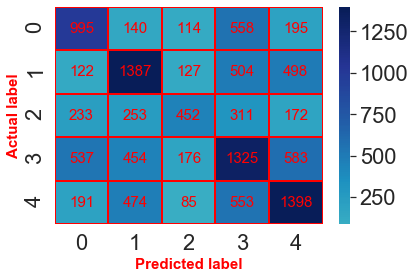

In [20]:
# creating a confusion matrix 
cm_xgboost = confusion_matrix(y_test, y_pred_xgbst)
print(cm_xgboost)
sn.set(font_scale=2.0) # for label size
akws = {"size": 15,"ha": 'center',"va": 'center',"color":'red'}
# font size, Horizontal position ('center', 'right', 'left'), 
#Vertical position('top', 'bottom', 'center', 'baseline', 'center_baseline')
ax=sn.heatmap(cm_xgboost, linewidths=1.0, linecolor="red",cmap="YlGnBu",center=0, annot=True,fmt="d", annot_kws=akws) 
plt.ylabel('Actual label', fontsize=15,fontweight="bold",color="red")
plt.xlabel('Predicted label', fontsize=15, fontweight="bold",color="red")
plt.show()

<h2 id="pattern_visualization"> SVM (Support vector machine) Multiclass classifier</h2>
SVM (Support vector machine) is an efficient classification method when the feature vector is high dimensional. In sci-kit learn, we can specify the kernel function (here, linear).

In [ ]:
# training a linear SVM classifier 
from sklearn.svm import SVC 
#svm_model_linear = SVC(kernel = 'rbf', C = 1,gamma=0.01).fit(X_train, y_train)
svm_model_linear = SVC(kernel = 'linear', C = 1,gamma='auto').fit(X_train, y_train)
svm_predictions = svm_model_linear.predict(X_test) 
  
# model accuracy for X_test   
accuracy = svm_model_linear.score(X_test, y_test) 
print(accuracy)  
# creating a confusion matrix 
cm_svm = confusion_matrix(y_test, svm_predictions)

In [ ]:
print(classification_report(y_test, svm_predictions))

In [ ]:
sn.set(font_scale=2.0) # for label size
akws = {"size": 15,"ha": 'center',"va": 'center',"color":'red'}
# font size, Horizontal position ('center', 'right', 'left'), 
#Vertical position('top', 'bottom', 'center', 'baseline', 'center_baseline')
ax=sn.heatmap(cm_svm, linewidths=2.0, linecolor="red",cmap="YlGnBu",center=0, annot=True,fmt="d", annot_kws=akws) 
plt.ylabel('Actual label', fontsize=15,fontweight="bold",color="red")
plt.xlabel('Predicted label', fontsize=15, fontweight="bold",color="red")
plt.show()

<h2 id="pattern_visualization"> KNN (k-nearest neighbours) classifier</h2>
KNN or k-nearest neighbours is the simplest classification algorithm. This classification algorithm does not depend on the structure of the data. Whenever a new example is encountered, its k nearest neighbours from the training data are examined. Distance between two examples can be the euclidean distance between their feature vectors. The majority class among the k nearest neighbours is taken to be the class for the encountered example.

In [21]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train) 
  
# accuracy on X_test 
accuracy = knn.score(X_test, y_test) 
print(accuracy) 
  
# creating a confusion matrix 
knn_predictions = knn.predict(X_test)  
cm_knn = confusion_matrix(y_test, knn_predictions) 
print(cm_knn)

0.4026358029906226
[[ 944  186  138  571  163]
 [ 257 1273  168  519  421]
 [ 288  279  401  286  167]
 [ 593  560  257 1122  543]
 [ 304  622  120  629 1026]]


In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, knn_predictions))

              precision    recall  f1-score   support

           0       0.40      0.47      0.43      2002
           1       0.44      0.48      0.46      2638
           2       0.37      0.28      0.32      1421
           3       0.36      0.36      0.36      3075
           4       0.44      0.38      0.41      2701

    accuracy                           0.40     11837
   macro avg       0.40      0.40      0.40     11837
weighted avg       0.40      0.40      0.40     11837



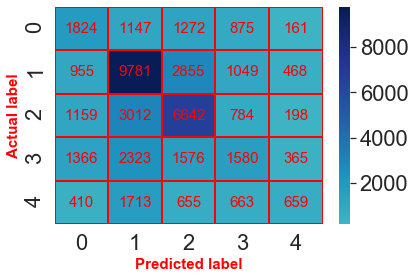

In [16]:
sn.set(font_scale=2.0) # for label size
akws = {"size": 15,"ha": 'center',"va": 'center',"color":'red'}
# font size, Horizontal position ('center', 'right', 'left'), 
#Vertical position('top', 'bottom', 'center', 'baseline', 'center_baseline')
ax=sn.heatmap(cm_knn, linewidths=1.0, linecolor="red",cmap="YlGnBu",center=0, annot=True,fmt="d", annot_kws=akws) 
plt.ylabel('Actual label', fontsize=15,fontweight="bold",color="red")
plt.xlabel('Predicted label', fontsize=15, fontweight="bold",color="red")
plt.show()

<h2 id="pattern_visualization"> Naive Bayes classifier</h2>
Naive Bayes classification method is based on Bayes’ theorem. It is termed as ‘Naive’ because it assumes independence between every pair of feature in the data. 

In [23]:
# training a Naive Bayes classifier 
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB().fit(X_train, y_train) 
gnb_predictions = gnb.predict(X_test) 
  
# accuracy on X_test 
accuracy = gnb.score(X_test, y_test) 
print(accuracy) 
  
# creating a confusion matrix 
cm_nb = confusion_matrix(y_test, gnb_predictions) 

0.273126636816761


In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test, gnb_predictions))

              precision    recall  f1-score   support

           0       0.20      0.02      0.03      2002
           1       0.34      0.17      0.23      2638
           2       0.00      0.00      0.00      1421
           3       0.27      0.84      0.41      3075
           4       0.21      0.06      0.10      2701

    accuracy                           0.27     11837
   macro avg       0.20      0.22      0.15     11837
weighted avg       0.23      0.27      0.18     11837



C:\Users\TOPU\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


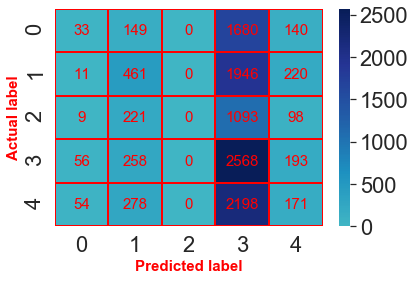

In [25]:
sn.set(font_scale=2.0) # for label size
akws = {"size": 15,"ha": 'center',"va": 'center',"color":'red'}
# font size, Horizontal position ('center', 'right', 'left'), 
#Vertical position('top', 'bottom', 'center', 'baseline', 'center_baseline')
ax=sn.heatmap(cm_nb, linewidths=1.0, linecolor="red",cmap="YlGnBu",center=0, annot=True,fmt="d", annot_kws=akws) 
plt.ylabel('Actual label', fontsize=15,fontweight="bold",color="red")
plt.xlabel('Predicted label', fontsize=15, fontweight="bold",color="red")
plt.show()

<h2 id="pattern_visualization">Here I use Multi-class classification without a classifier!</h2>
Almost all model including XGBoost produces result with only ~40% accuracy 

Lets try <b>one-vs-one and one-vs-rest SVVM classifiers</b>

In [31]:
# from xgboost import XGBClassifier
# from sklearn.multiclass import OneVsRestClassifier
# xgb_classifier = OneVsRestClassifier(XGBClassifier())
# #xgb_classifier.fit(np.array(training_inputs), training_outputs_labels)
# #X_train, X_test, y_train, y_test 
# xgb_classifier.fit(np.array(X_train), y_train)
# xbg_predictions_labels = xgb_classifier.predict(X_test)
# print(xbg_predictions_labels[0:30])

# SVM for multi-class classification using one-vs-one
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier
# # define dataset
# X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, n_classes=3, random_state=1)
# define model
model = SVC(kernel = 'linear', C = 1,gamma='auto')
# define ovo strategy
ovo = OneVsOneClassifier(model)
# fit model
ovo.fit(X_train, y_train)
# make predictions
yhat_svm = ovo.predict(X_test)

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, yhat_svm))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2002
           1       0.38      0.10      0.16      2638
           2       0.00      0.00      0.00      1421
           3       0.26      0.96      0.42      3075
           4       0.00      0.00      0.00      2701

    accuracy                           0.27     11837
   macro avg       0.13      0.21      0.12     11837
weighted avg       0.15      0.27      0.14     11837



C:\Users\TOPU\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [39]:
# accuracy on X_test 
accuracy = ovo.score(X_test, y_test) 
print(accuracy) 

0.2721128664357523


In [37]:
# SVM for multi-class classification using one-vs-rest
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
# # define dataset
# X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, n_classes=3, random_state=1)
# define model
model = SVC(kernel = 'linear', C = 1,gamma='auto')
# define ovo strategy
ovr = OneVsRestClassifier(LinearSVC(random_state=0, multi_class='ovr')).fit(X_train, y_train)
ovr.fit(X_train, y_train)
# make predictions
yhat_svm_ovr = ovr.predict(X_test)

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, yhat_svm_ovr))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2002
           1       0.32      0.19      0.24      2638
           2       0.00      0.00      0.00      1421
           3       0.27      0.90      0.41      3075
           4       0.00      0.00      0.00      2701

    accuracy                           0.28     11837
   macro avg       0.12      0.22      0.13     11837
weighted avg       0.14      0.28      0.16     11837



C:\Users\TOPU\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [40]:
# accuracy on X_test 
accuracy = ovr.score(X_test, y_test) 
print(accuracy)

0.27650587142012334


<hr>
<p>Copyright &copy; 2020 Mustafizur Rahman <a href="https://www.linkedin.com/in/dr-mohammad-rahman-2434b313/">LinkedIn</a>.</p>